## Importing and Cleaning the Raw Data:
*My raw data goes through the following changes once put through the **load_process** function:*
- Replace all blank values as nan
- Drop all rows with nan in them
- Reset the index of the no-nan dataframe
- Rename each column since they have slight errors to them
- Convert Cocoa Percentage from a string to a float
- Copy the processed data file to its respective folder

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from Scripts.function import load_process
from Scripts.function import make_table

In [2]:
df = load_process("../data/raw/flavors_of_cacao.csv")
df

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Carenero,1315,2014,0.70,France,2.75,Criollo,Venezuela
1,A. Morin,Sur del Lago,1315,2014,0.70,France,3.50,Criollo,Venezuela
2,A. Morin,Puerto Cabello,1319,2014,0.70,France,3.75,Criollo,Venezuela
3,A. Morin,Madagascar,1011,2013,0.70,France,3.00,Criollo,Madagascar
4,A. Morin,Chuao,1015,2013,0.70,France,4.00,Trinitario,Venezuela
...,...,...,...,...,...,...,...,...,...
879,Zotter,El Oro,879,2012,0.75,Austria,3.00,Forastero (Nacional),Ecuador
880,Zotter,Huiwani Coop,879,2012,0.75,Austria,3.00,"Criollo, Trinitario",Papua New Guinea
881,Zotter,"Kongo, Highlands",883,2012,0.68,Austria,3.25,Forastero,Congo
882,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo


## Exploratory Data Analysis (EDA):

#### Profile Report
*Creating a profile report gives me a nice overview of my data and lets me narrow down what data I will compare in my EDA*

In [3]:
import pandas_profiling as pdp
profile = pdp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Describe Numbers
*Gives me information about the quantitative data I have.*

In [4]:
df.describe(exclude=np.object).T

,count,mean,std,min,25%,50%,75%,max
REF,884.0,937.572398,566.936444,5.0,411.5,951.00,1426.00,1944.0
Review Date,884.0,2011.777149,3.079376,2006.0,2009.0,2012.00,2014.00,2017.0
Cocoa Percent,884.0,0.718954,0.061241,0.5,0.7,0.70,0.75,1.0
Rating,884.0,3.227658,0.465389,1.0,3.0,3.25,3.50,5.0


**Observations:**
- The REF is not of any use when describing since mean/quartiles since it doesn't make sense.
- All chocolate bars have a mean average of 72% cocoa.
- All chocolate bars have a mean average rating of 3.2/5.

#### Describe Objects
*Gives me information about the qualitative data I have.*

In [5]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Company (Maker-if known),884,282,Soma,35
Specific Bean Origin or Bar Name,884,537,Madagascar,54
Company Location,884,50,U.S.A.,308
Bean Type,884,40,Trinitario,417
Broad Bean Origin,884,66,Venezuela,139


**Observations:**
- The most rated company location is the USA.
- Many chocolate bars have beans from Venezuela.
- The most popular bean type to use is the Trinitario.

#### Company Location VS Bean Type
*Shows which bean types are most commonly USED by each country.*

Text(0.5, 1.0, 'Company Location VS Bean Type')

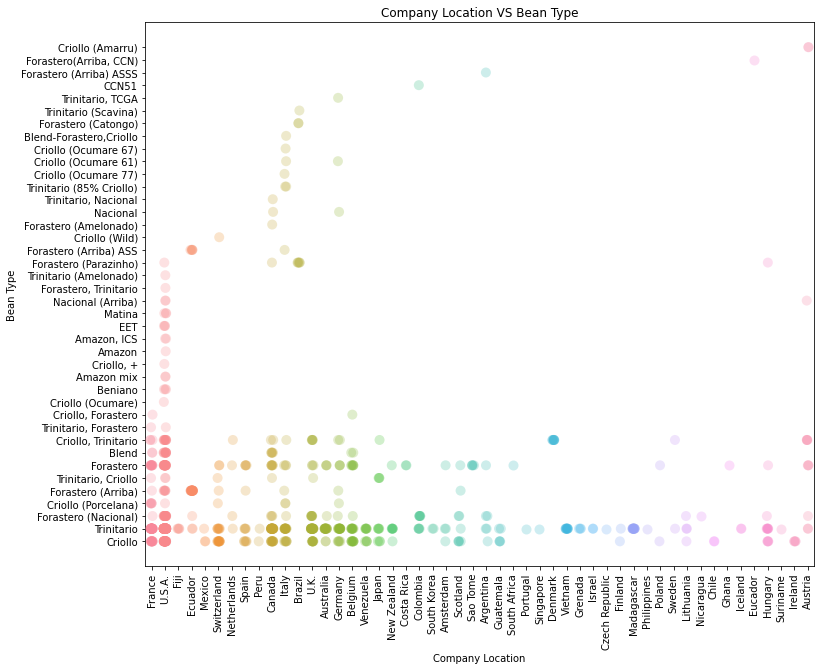

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
plt.xticks(rotation=90)
sns.stripplot(data=df,
              x="Company Location",
              y="Bean Type",
              size=10,
              alpha=0.25).set_title("Company Location VS Bean Type")

**Observations:**
- The darker a dot is, the more that bean is used in that country.
- As previously observed, the Trinitario is the most commonly used bean. Here I can see what countries use it the most.
- The USA uses more types of beans than any other country.

#### Bean Type VS Bean Origin
*Shows which bean types are most commonly FARMED by each country.*

Text(0.5, 1.0, 'Bean Type VS Broad Bean Origin')

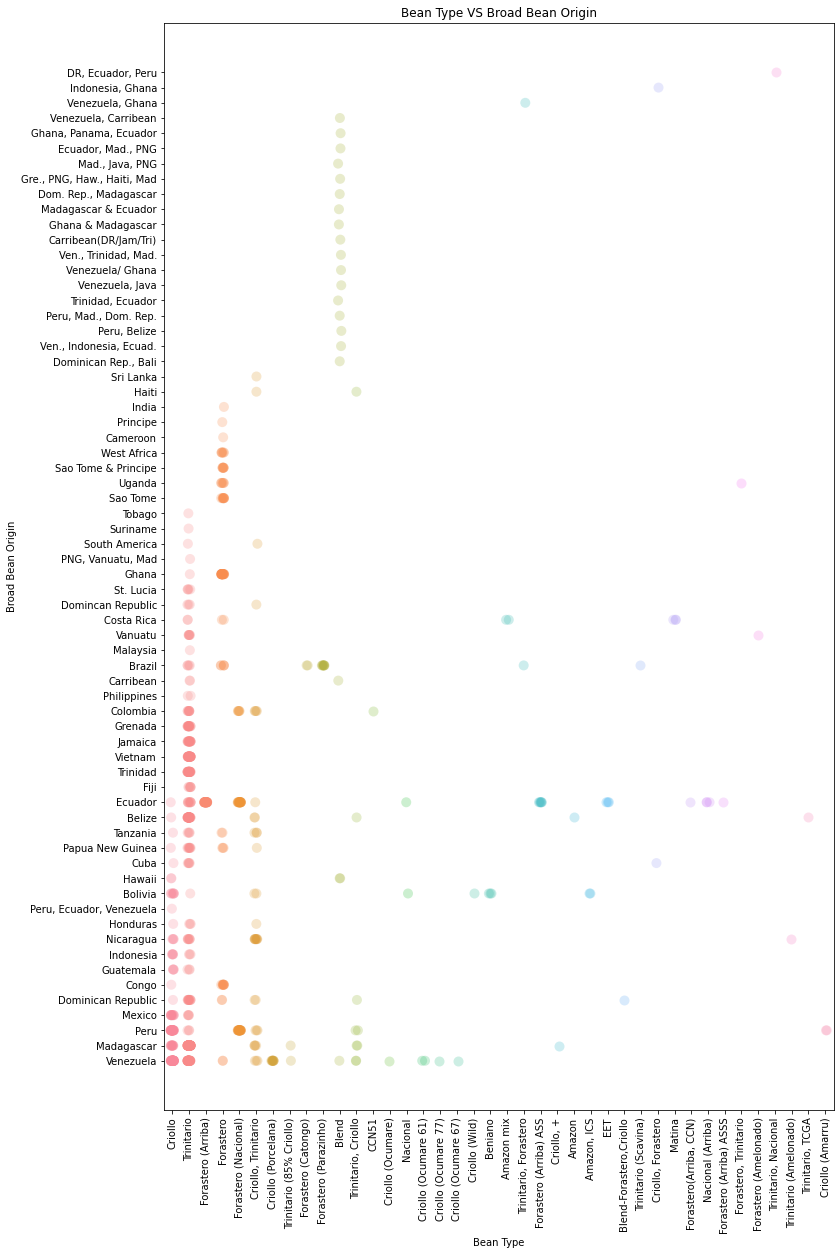

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12,20)
plt.xticks(rotation=90)
sns.stripplot(data=df,
              x="Bean Type",
              y="Broad Bean Origin",
              size=10,
              alpha=0.25).set_title("Bean Type VS Broad Bean Origin")

**Observations:**
- The darker a dot is, the more that bean is farmed in that country.
- Equador and Venezuela have the highest variety of beans farmed.
- The Trinitario bean is one of most farmed cocoa beans in the world. Here, I can see which countries farm it.

#### Review Date Histogram
*Shows how many ratings were done each year.*

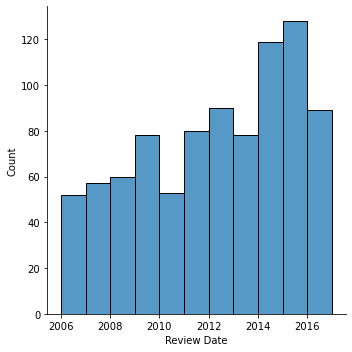

In [8]:
sns.displot(data=df,
            x="Review Date")

**Observations:**
- The year with the most ratings was 2015-2016
- The year with the least ratings was 2006-2007
- For the most part, ratings were made at an increased rate as time went on.

## Answering Research Questions:

### *Does cocoa bean type influence a bars rating? (Bean Type Analysis):*

#### Table:
Ordered the Bean Type by mean rating.

In [9]:
beanType = make_table(df,"Bean Type")
beanType

,Bean Type,Rating
0,Criollo (Ocumare 67),4.000000
1,Criollo (Wild),4.000000
2,Trinitario (85% Criollo),3.875000
3,Forastero (Amelonado),3.750000
4,"Trinitario, Nacional",3.750000
5,Amazon mix,3.750000
6,Criollo (Ocumare 77),3.750000
7,"Trinitario, TCGA",3.750000
8,"Blend-Forastero,Criollo",3.750000
9,"Amazon, ICS",3.625000


#### Graph Visual:
Converted the table above into a visual.

Text(0.5, 1.0, 'Bean Type Sorted by Rating')

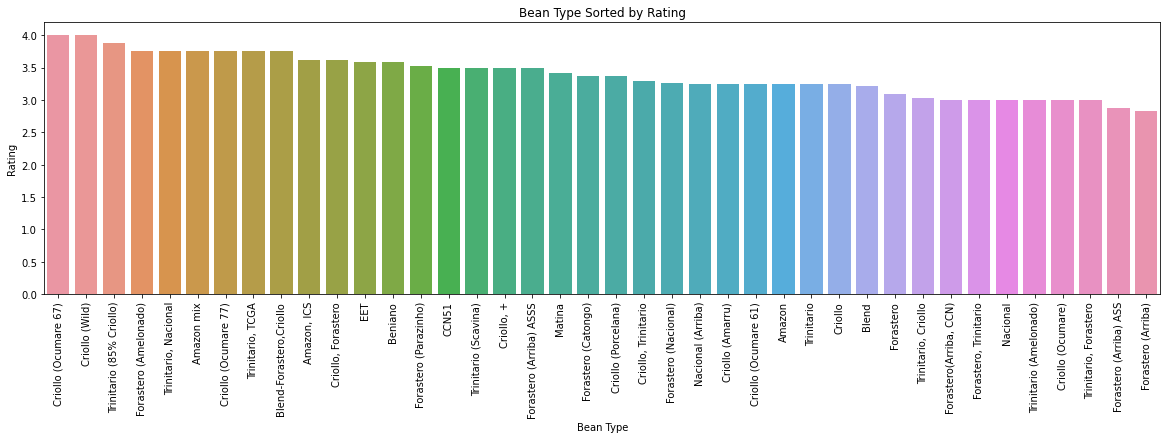

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
ax = plt.gca()
plt.xticks(rotation=90)
sns.barplot(data=beanType,
            x='Bean Type',
            y='Rating').set_title("Bean Type Sorted by Rating")

#### Observations:
- There is a clear sign that bean type has some influence on a chocolate bars rating.
- If the bean type didn't influence rating, then the bar plot would be much more flat.
- Criollo (Ocumare 67) is most likely to rated the best chocolate bar while Forastero (Arriba) is most likely to be rated the worst.
- According to the visual, **bean type can influence the overall rating**.

## *Does cocoa percentage influence a bars rating? (Cocoa Percentage Analysis):*

#### Table:
Ordered the Cocoa Percentage by mean rating.

In [11]:
cocoaP = make_table(df,'Cocoa Percent')
cocoaP

,Cocoa Percent,Rating
0,0.500,3.750000
1,0.690,3.562500
2,0.630,3.437500
3,0.700,3.360927
4,0.740,3.340000
5,0.680,3.294643
6,0.780,3.291667
7,0.730,3.291667
8,0.660,3.272727
9,0.670,3.264706


#### Graph Visual:
Converted the table above into a visual.

Text(0.5, 1.0, 'Cocoa Percent VS Rating')

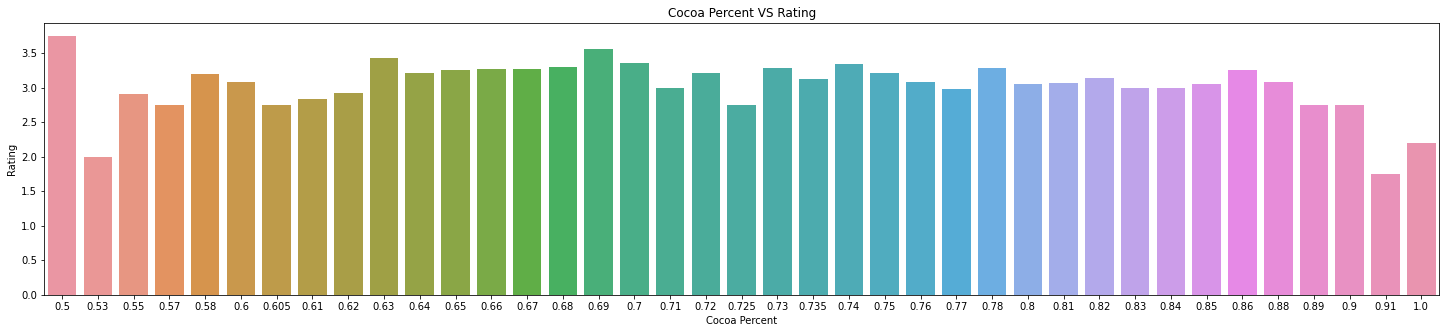

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(25,5)
sns.barplot(data=cocoaP,
            x='Cocoa Percent',
            y='Rating').set_title("Cocoa Percent VS Rating")

#### Observations:
- It's hard to tell if cocoa percentage truly has any effect on overall rating since there is no clear trend or slope that would indicate so.
- This makes sense due to the fact that cocoa percentages are more reflective of the type of chocolate, not the quality. For example, milk chocolate is made with a low cocoa percentage yet can still be high quality.
- According to the visual, **cocoa percentage doesn't have much of an effect on rating**.

## *Does chocolate company/maker influence a bars rating? (Company/Maker Analysis):*

#### Table:
Ordered the Company/Maker by mean rating.

In [13]:
company = make_table(df,'Company (Maker-if known)')
company

,Company (Maker-if known),Rating
0,Tobago Estate (Pralus),4.0000
1,Heirloom Cacao Preservation (Zokoko),3.8750
2,Ocelot,3.8750
3,Bar Au Chocolat,3.8750
4,Matale,3.8125
...,...,...
277,Bouga Cacao (Tulicorp),2.3750
278,C-Amaro,2.3750
279,Snake & Butterfly,2.2500
280,TCHO,2.2500


#### Graph Visual:
Converted the table above into a visual.

Text(0.5, 1.0, 'Company/Maker Sorted by Rating')

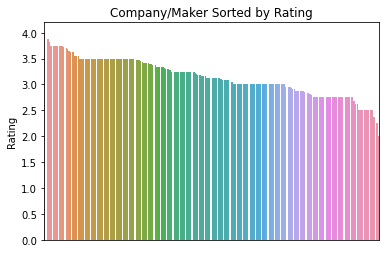

In [19]:
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
sns.barplot(data=company,
            x='Company (Maker-if known)',
            y='Rating').set_title("Company/Maker Sorted by Rating")

#### Observations:
- There is a clear sign that Company/Maker has an influence on a chocolate bars rating.
- It should be noted that unlike the bean type visual, company seems to have a greater influence as it is nearly twice as steep.
- Tobago Estate (Pralus) is most likely to rated the best chocolate bar while Jacque Torres is most likely to be rated the worst.
- According to the visual, **Company/Maker can influence the overall rating**.

## *Does bean origin influence a bars rating? (Bean Origin Analysis):*

#### Table:
Ordered the Bean Origin by mean rating.

In [15]:
beanOrig = make_table(df,'Broad Bean Origin')
beanOrig

,Broad Bean Origin,Rating
0,Tobago,4.000000
1,"Gre., PNG, Haw., Haiti, Mad",4.000000
2,"Venezuela, Java",4.000000
3,"Dom. Rep., Madagascar",4.000000
4,"DR, Ecuador, Peru",3.750000
...,...,...
61,Uganda,2.821429
62,Sri Lanka,2.750000
63,Principe,2.750000
64,West Africa,2.583333


#### Graph Visual:
Converted the table above into a visual.

Text(0.5, 1.0, 'Bean Origin Sorted by Rating')

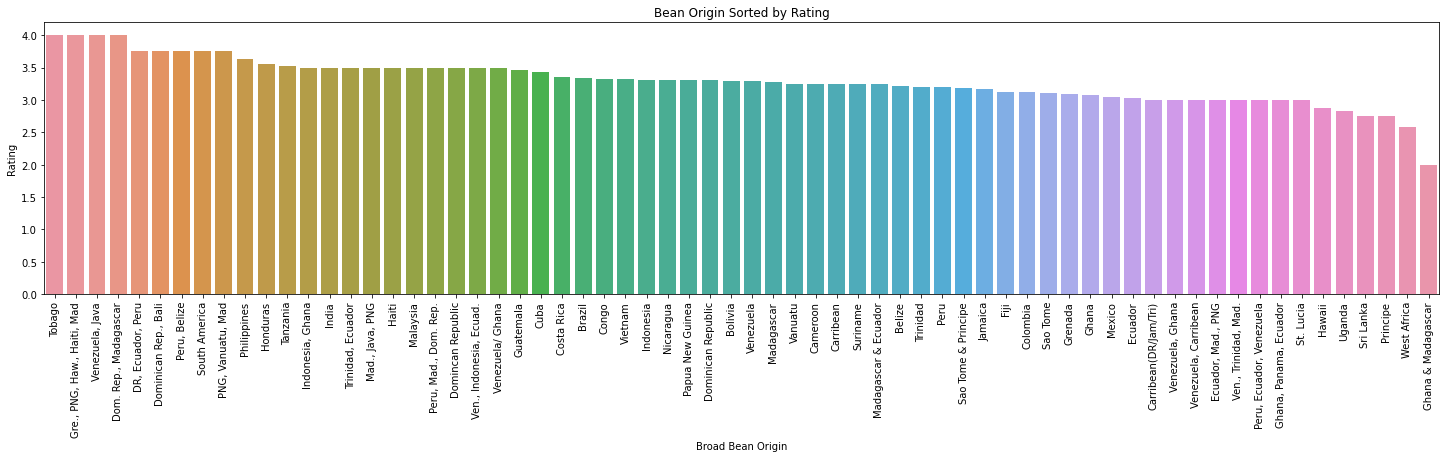

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(25,5)
ax = plt.gca()
plt.xticks(rotation=90)
sns.barplot(data=beanOrig,
            x='Broad Bean Origin',
            y='Rating').set_title("Bean Origin Sorted by Rating")

#### Observations:
- There is a clear sign that Bean Origin has an influence on a chocolate bars rating. Some countries/combinations of countries yield higher rating chocolate than others.
- Much like the bean type, if the bean origin didn't influence rating, then the bar plot would be much more flat.
- Tobago is most likely produce the best chocolate bars while Ghana & Madagascar is most likely to make the worst.
- According to the visual, **Bean Origin can possibly influence the overall rating**.